# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

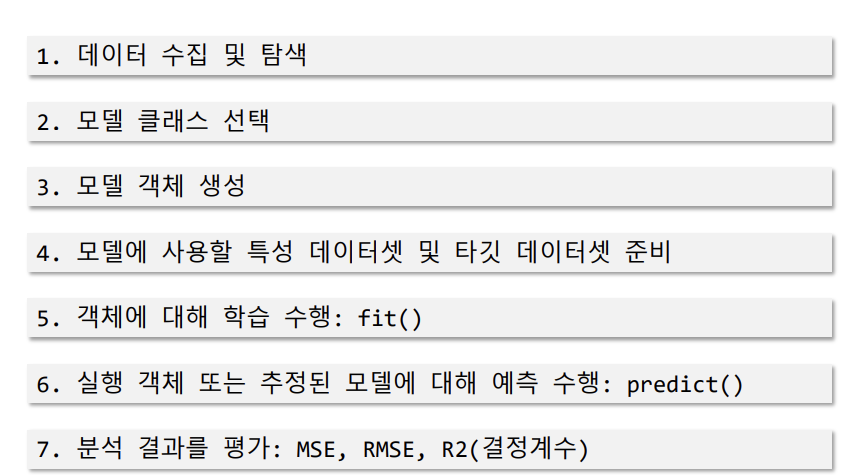

### 필요한 모듈 import

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [27]:
beer=pd.read_csv("./data/beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

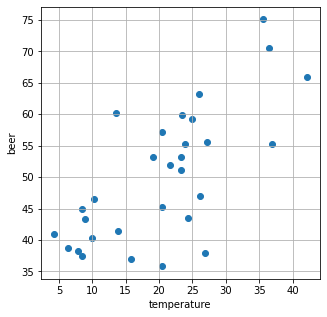

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'],beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [8]:
# 독립 변수, 종속 변수 확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [28]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [29]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X=np.array(beer['temperature']).reshape(-1,1)
y=beer['beer']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### 모델 구축

In [30]:
from sklearn.linear_model import LinearRegression

#모델 클래스 선택 후 인스턴스 객체 생성

lr=LinearRegression()

In [31]:
# 학습 수행- fit
reg = lr.fit(X_train,y_train)

In [32]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

(array([0.69705648]), 36.06666541566105)

In [17]:
#회귀식
print("y= {:2f}X + {:.3f}".format(reg.coef_[0],reg.intercept_))

y= 0.697056X + 36.067


In [34]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
#print(y_pred)
print(np.round(y_pred,2))

[60.81 50.36 54.33 50.36 41.92 43.18]


### 모델 성능 평가

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test,y_pred
                        )
#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))

MSE: 91.347
RMSE: 9.558


In [20]:
#결정계수 R2
r2 = r2_score(y_test,y_pred)
print("R2:", np.round(r2,3))

R2: 0.485


In [36]:
# 회귀 객체의 score을 이용할 수도 있음
print(reg.score(X_test,y_test))

0.48456481297951504


### 시각화

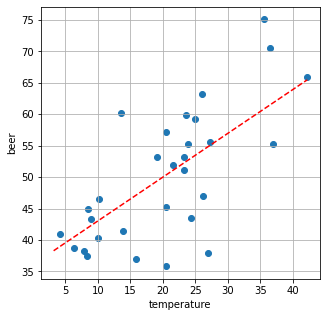

In [37]:
#y = 0.697056X + 36.06 시각화

plt.figure(figsize=(5,5))
xx=np.arange(beer['temperature'].min()-1,
            beer['temperature'].max()+1)
yy=reg.predict(xx.reshape(len(xx),1))

plt.plot(xx,yy,linestyle='--',color='red')

# 수집한 데이터셋 시각화
plt.scatter(beer['temperature'],beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

# 응용1. 나이, 키의 관계를 회귀 분석

In [1]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [3]:
data_df = pd.read_csv("./data/age_height.csv")
data_df

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


In [9]:
data_df.columns

Index(['age(X)', 'height(T)'], dtype='object')

#### 데이터 탐색

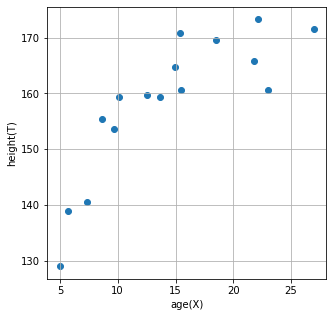

In [15]:
# 데이터 분포 시각화
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'],data_df['height(T)'])
plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.grid()
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [17]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

# 독립변수, 종속변수 데이터셋 준비
X=np.array(data_df['age(X)']).reshape(-1,1)
y=data_df['height(T)']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [20]:
#모델 객체 생성  및 학습
reg= lr.fit(X_train,y_train)

# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))

[156.85 177.56 158.41 145.98]


In [23]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용
from sklearn.metrics import mean_squared_error,r2_score

# MSE
mse = mean_squared_error(y_test,y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test,y_pred)

#회귀식
print("y={:2f}X + {:3f}".format(reg.coef_[0],reg.intercept_))

print("MSE:",np.round(mse,3))
print("RMSE:",np.round(rmse,3))
print("r2_score:",np.round(r2,3))

y=1.438635X + 138.784194
MSE: 83.495
RMSE: 9.138
r2_score: 0.663


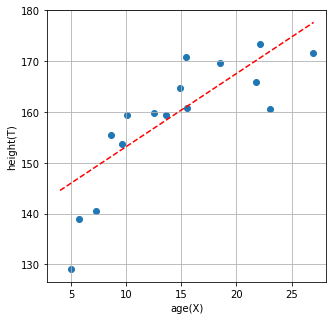

In [30]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'],data_df['height(T)'])
plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.grid()


#y = 0.697056X + 36.06 시각화
xx=np.arange(data_df['age(X)'].min()-1,
             data_df['age(X)'].max()+1)
yy= reg.predict(xx.reshape(len(xx),1))

plt.plot(xx,yy,linestyle='--',color='red')
plt.show()

# < 스탯츠모델에서 단순선형회귀 수행>

In [35]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성

beer = pd.read_csv('./data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
import numpy as np

X= np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

# train,test 분류
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# 특성행렬 - 상수항이 더해진 입력변수
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [33]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [34]:
# 상수항 더해서 새로 만들어줌 - 스탯츠 모델에는 자동이 없어
X_test = sm.add_constant(X_test)
X_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [37]:
# 스탯츠모델 - 잔차의 최소제곱 OLS
lr = sm.OLS(y_train,X_train)

reg = lr.fit()

In [39]:
# 성능 평가
y_pred = reg.predict(X_test)

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           9.50e-05
Time:                        16:24:42   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

In [40]:
from sklearn.datasets import load_boston

boston = load_boston()

### 데이터 탐색

In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [46]:
boston.feature_names #13개

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [49]:
boston.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

### 데이터 준비

In [48]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [50]:
import pandas as pd

df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [51]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
#RM 방의 갯수 - 바로 2차원으로 만들었음
X= pd.DataFrame(df['RM'])
y = boston.target

In [55]:
X[:5]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


### 학습용/ 검증용 데이터 분리

In [57]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


### 모델 구축

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [59]:
# 모델 학습
reg = lr.fit(X_train,y_train)

In [60]:
# 예측 수행
y_pred = reg.predict(X_test)

### 모델 평가

In [61]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred) # reg.score()

print("MSE:",np.round(mse,3))
print("RMSE:",np.round(rmse,3))
print("R2:",np.round(r2,3))


MSE: 36.517
RMSE: 6.043
R2: 0.602


In [62]:
# 회귀식
reg.coef_, reg.intercept_

(array([8.46109164]), -30.571032410898336)

### 시각화

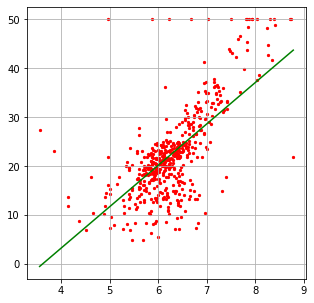

In [64]:
# 방의 갯수와 주택 중간 가격 관계 시각화
# y = 8.46 X - 30.57

plt.figure(figsize=(5,5))
plt.scatter(X,y,c='r',s=5)

xx=np.linspace(X.min(),X.max())
yy = reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,linestyle='-',color='g')
plt.grid()
plt.show()